In [1]:
import json
import seaborn as sns
import os
from matplotlib import pyplot as plt
from collections import Counter,defaultdict
import glob
import pandas as pd

In [2]:
topic_assignment_dir = '/shared/2/projects/cross-lingual-exchange/data/topic_model_data/multilingual_with_top100_hashtags_50topics_1Mtrain'
hashtag_topics_file = '/shared/2/projects/cross-lingual-exchange/data/topic_model_data/top100_hashtags_by_topic_50topics_1M.json'

In [3]:
plots_dir = '/shared/2/projects/cross-lingual-exchange/results/plots/'
if not os.path.exists(plots_dir):
    os.mkdir(plots_dir)
topic_dist_dir = os.path.join(plots_dir,'topic_distributions')
if not os.path.exists(topic_dist_dir):
    os.mkdir(topic_dist_dir)

In [5]:
tweet_topic_counts = Counter()
topic_assignment_files = glob.glob(os.path.join(topic_assignment_dir,'*'))
for filename in topic_assignment_files:
    with open(filename) as f:
        for line in f:
            tweet_topic_counts[int(line.strip())] += 1
tweet_topic_dist = {}
for key in tweet_topic_counts:
    tweet_topic_dist[key] = tweet_topic_counts[key] / sum(tweet_topic_counts.values())

In [7]:
sum(tweet_topic_dist.values())

1.0

In [8]:
with open(hashtag_topics_file,'r') as f:
    hashtag_topics = json.load(f)

In [9]:
hashtag_topic_counts = {}
for topic in hashtag_topics:
    hashtag_topic_counts[int(topic)] = sum([x[0] for x in hashtag_topics[topic]])

In [10]:
hashtag_topic_dist = {}
for key in hashtag_topic_counts:
    hashtag_topic_dist[key] = hashtag_topic_counts[key] / sum(hashtag_topic_counts.values())

In [11]:
unique_hashtag_topic_counts = {}
for topic in hashtag_topics:
    unique_hashtag_topic_counts[int(topic)] = len(hashtag_topics[topic])

In [12]:
unique_hashtag_topic_dist = {}
for key in unique_hashtag_topic_counts:
    unique_hashtag_topic_dist[key] = unique_hashtag_topic_counts[key] / sum(unique_hashtag_topic_counts.values())

In [13]:
df_tweet = pd.DataFrame.from_dict(tweet_topic_dist,orient='index').reset_index()
df_tweet.columns=['Topic','Frequency']

In [14]:
df_hashtag = pd.DataFrame.from_dict(hashtag_topic_dist,orient='index').reset_index()
df_hashtag.columns=['Topic','Frequency']

In [15]:
df_unique_hashtag = pd.DataFrame.from_dict(unique_hashtag_topic_dist,orient='index').reset_index()
df_unique_hashtag.columns=['Topic','Frequency']

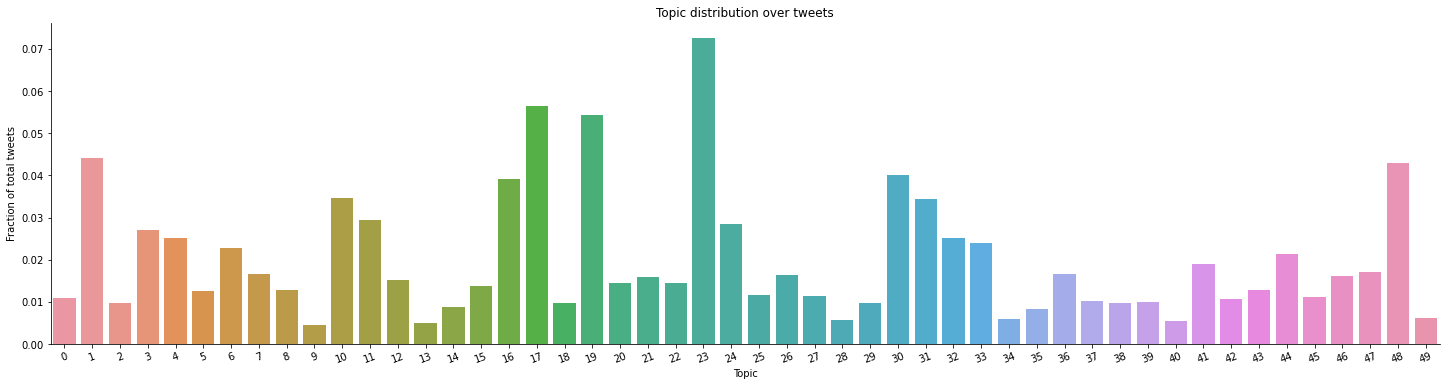

In [171]:
sns.catplot(x='Topic',y='Frequency',data=df_tweet, kind='bar',aspect=4)
plt.xticks(rotation=20)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Fraction of total tweets')
plt.title('Topic distribution over tweets')
plt.savefig(os.path.join(topic_dist_dir,'tweet_distribution.pdf'),bbox_inches='tight')
plt.show()

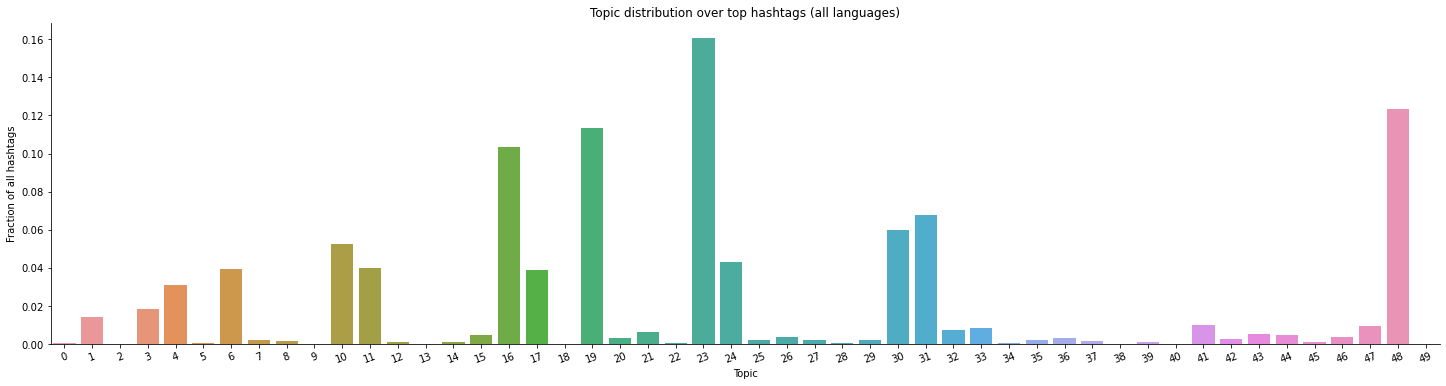

In [172]:
sns.catplot(x='Topic',y='Frequency',data=df_hashtag, kind='bar',aspect=4)
plt.xticks(rotation=20)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Fraction of all hashtags')
plt.title('Topic distribution over top hashtags (all languages)')
plt.savefig(os.path.join(topic_dist_dir,'total_hashtag_distribution.pdf'),bbox_inches='tight')
plt.show()

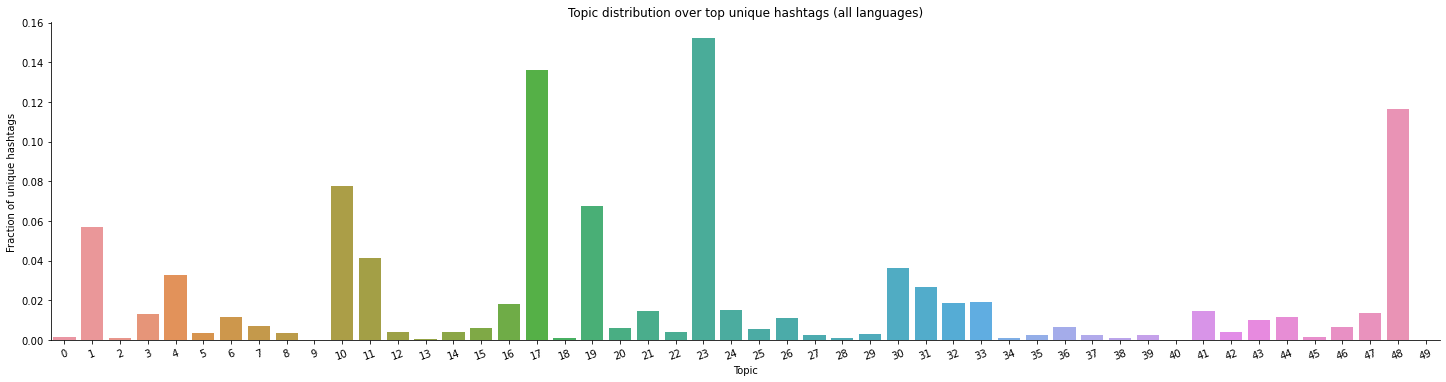

In [173]:
sns.catplot(x='Topic',y='Frequency',data=df_unique_hashtag, kind='bar',aspect=4)
plt.xticks(rotation=20)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Fraction of unique hashtags')
plt.title('Topic distribution over top unique hashtags (all languages)')
plt.savefig(os.path.join(topic_dist_dir,'unique_hashtag_distribution.pdf'),bbox_inches='tight')
plt.show()

In [87]:
entertainment_topics = ['1','10','19','24','44']
promotion_topics = ['3','16','31']
politics_topics = ['11','23','30','41','46','47']
sports_topics = ['48']
topic_list = entertainment_topics + promotion_topics + sports + politics_topics
topic_list = [int(topic) for topic in topic_list]

In [81]:
df_tweet[df_tweet['Topic'].isin(topic_list)].sum() #0.520594 Tweets covered by these 15 topics

Topic        394.000000
Frequency      0.520594
dtype: float64

In [82]:
df_hashtag[df_hashtag['Topic'].isin(topic_list)].sum()  #0.825037 of top hashtags (considering frequency) in 15 topics

Topic        394.000000
Frequency      0.825037
dtype: float64

In [83]:
df_unique_hashtag[df_unique_hashtag['Topic'].isin(topic_list)].sum() #0.668353 of all top hashtags in 15 topics

Topic        394.000000
Frequency      0.668353
dtype: float64

In [ ]:
topic_map = {}
topic_map['1'] = 'Entertainment-TV' 
topic_map['10'] = 'Entertainment-Kpop'
topic_map['19'] = 'Entertainment-Art'
topic_map['24'] = 'Entertainment-romance-tv'
topic_map['44'] = 'Entertainment-promo'
topic_map['3'] = 'Promotion-Jobs'
topic_map['16'] = 'Promotion-giveaway'
topic_map['31'] = 'Promotion-music'
topic_map['11'] = 'Politics-news'
topic_map['23'] = 'Politics'
topic_map['30'] = 'Politics-Regions'
topic_map['41'] = 'Politics-Health-Advocacy'
topic_map['46'] = 'Politics-Family-Support'
topic_map['47'] = 'Politics-Feminism'
topic_map['48'] = 'Sports'


In [27]:
#Create map from hashtag to topic 
hashtag_to_topic = {}
for topic in hashtag_topics:
    for freq,hashtag in hashtag_topics[topic]:
        hashtag_to_topic[hashtag] = topic

In [24]:
# Get hashtags by language and topic 
# For each language, get unique topic distribution
base_dir = '/shared/2/projects/cross-lingual-exchange/data/'
country_lang_file = os.path.join(base_dir,'country_languages.tsv')
language_set = sorted(list(set(pd.read_csv(country_lang_file,sep='\t')['language'])))
topic_model_data_dir = os.path.join(base_dir,'topic_model_data')
top_temporal_hashtag_file_by_lang = os.path.join(topic_model_data_dir,'all_top100_hashtags_by_lang.json')

In [25]:
with open(top_temporal_hashtag_file_by_lang,'r') as f:
    top_hashtags_by_lang = json.load(f)

In [44]:
lang_hashtag_topics = {}
for lang in top_hashtags_by_lang:
    hashtags = list(set(top_hashtags_by_lang[lang]))
    topics = [hashtag_to_topic[h] for h in hashtags if h in hashtag_to_topic]
    lang_hashtag_topics[lang] = Counter(topics)
    

In [12]:
with open(hashtag_topics_file) as f:
    hashtag_topics = json.load(f)
for topic in hashtag_topics:
    hashtag_topics[topic] = [h[1] for h in hashtag_topics[topic]]


In [90]:
lang_topic_dist = []
for lang in lang_hashtag_topics:
    total = sum(lang_hashtag_topics[lang].values())
    entertainment_percent = sum(lang_hashtag_topics[lang][t] for t in entertainment_topics) / total
    promotion_percent = sum(lang_hashtag_topics[lang][t] for t in promotion_topics) / total
    politics_percent = sum(lang_hashtag_topics[lang][t] for t in politics_topics) / total
    sports_percent = sum(lang_hashtag_topics[lang][t] for t in sports_topics) / total
    total_percent = entertainment_percent + politics_percent + promotion_percent + sports_percent
    lang_topic_dist.append([lang,entertainment_percent,promotion_percent,politics_percent,sports_percent,total_percent])
    
df_lang = pd.DataFrame(lang_topic_dist,columns = ['Language','Entertainment','Promotion','Politics','Sports','Total'])   
df_lang


,Language,Entertainment,Promotion,Politics,Sports,Total
0,bg,0.416667,0.050000,0.300000,0.033333,0.800000
1,ca,0.167035,0.041207,0.398087,0.031641,0.637969
2,cs,0.352217,0.044335,0.182266,0.137931,0.716749
3,da,0.135678,0.050251,0.247487,0.292714,0.726131
4,de,0.161211,0.053737,0.369981,0.172946,0.757875
5,el,0.270580,0.030364,0.312416,0.122132,0.735493
6,en,0.195448,0.128514,0.231593,0.125167,0.680723
7,es,0.340679,0.083737,0.210665,0.040106,0.675187
8,et,0.318618,0.230326,0.074856,0.097889,0.721689
9,fi,0.159635,0.031927,0.431015,0.093501,0.716078


In [178]:
lang_order = list(df_lang2[df_lang2['Macro-Topic']=='Politics'].sort_values(by='Frequency',ascending=False)['Language'])
topic_order = ['Politics','Entertainment','Sports','Promotion']

In [179]:
lang_order

['fi', 'de', 'it', 'fr', 'pl', 'no', 'ro', 'tr', 'en', 'ru', 'es', 'hu', 'pt']

In [165]:
len(lang_order)
lang_labels = ['Finnish','Catalan','German','Italian','French','Polish',
              'Norwegian','Romanian','Turkish','English','Russian','Spanish','Hungarian','Portuguese']

([<matplotlib.axis.XTick at 0x7f65b465ee50>,
 [Text(0, 0, 'Finnish'),
  Text(1, 0, 'Catalan'),
  Text(2, 0, 'German'),
  Text(3, 0, 'Italian'),
  Text(4, 0, 'French'),
  Text(5, 0, 'Polish'),
  Text(6, 0, 'Norwegian'),
  Text(7, 0, 'Romanian'),
  Text(8, 0, 'Turkish'),
  Text(9, 0, 'English'),
  Text(10, 0, 'Russian'),
  Text(11, 0, 'Spanish'),
  Text(12, 0, 'Hungarian'),
  Text(13, 0, 'Portuguese')])

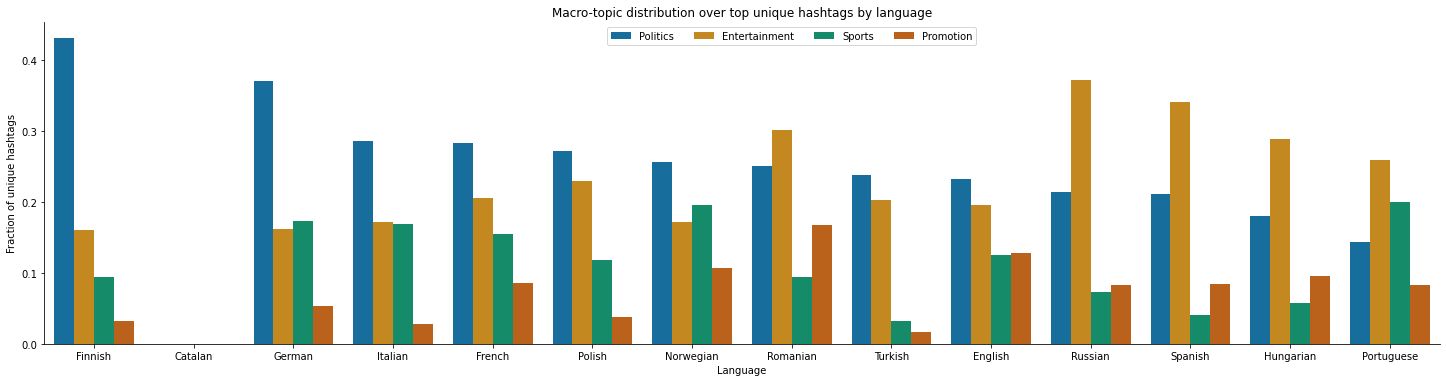

In [177]:
df_lang2 = pd.melt(df_lang,id_vars=['Language'])
df_lang2.columns = ['Language','Macro-Topic','Frequency']
df_lang2 = df_lang2[df_lang2['Language'].isin(['de','en','es','gr','fi','fr','hu','it','no','pl','pt','ro','ru','tr'])]
df_lang2 = df_lang2[df_lang2['Macro-Topic']!='Total']
sns.catplot(x='Language',y='Frequency',data=df_lang2, kind='bar',aspect=4,hue='Macro-Topic',
            palette='colorblind',legend=False, hue_order=topic_order,order=lang_order)
#plt.xticks(rotation=20)
#plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Fraction of unique hashtags')
plt.title('Macro-topic distribution over top unique hashtags by language')
plt.legend(bbox_to_anchor=(0.4,1),ncol=4)
plt.xticks(ticks=range(len(lang_order)),labels=lang_labels)
#plt.savefig(os.path.join(topic_dist_dir,'language_unique_hashtag_topic_distribution.pdf'),bbox_inches='tight')

In [99]:
df_lang.sort_values(by='Total')  #Lowest coverage: Turkish (48.9) and Lithuanian (54.2)
                                 #Highest coverage: Romanian (81.2), Bulgarian and Georgian (80), 
                                 #Hebrew (79.4), German (75.6)
    

,Language,Entertainment,Promotion,Politics,Sports,Total
27,tr,0.202717,0.017120,0.237500,0.032065,0.489402
17,lt,0.250000,0.194444,0.055556,0.041667,0.541667
13,is,0.384615,0.025641,0.042735,0.128205,0.581197
11,hu,0.288462,0.096154,0.179487,0.057692,0.621795
1,ca,0.167035,0.041207,0.398087,0.031641,0.637969
14,it,0.172131,0.027965,0.285921,0.168756,0.654773
21,pl,0.229878,0.038415,0.271951,0.117683,0.657927
19,nl,0.215385,0.044056,0.251748,0.163636,0.674825
7,es,0.340679,0.083737,0.210665,0.040106,0.675187
6,en,0.195448,0.128514,0.231593,0.125167,0.680723


In [144]:
hashtag_topics['1'][:100]

[[22447, 'skamitalia'],
 [18294, 'fiersdetrebleus'],
 [17835, 'sanremo2020'],
 [13880, 'sanremo2019'],
 [12904, 'skamfrance'],
 [9638, 'mivoto20'],
 [9320, 'skijumpingfamily'],
 [9157, 'laresistencia'],
 [6872, 'chilhavisto'],
 [6737, 'masterchefgr'],
 [6567, 'thearchers'],
 [6110, 'clario'],
 [5748, 'ibes'],
 [5365, 'shoppingstar'],
 [5341, '100pytan'],
 [5116, 'masterchef'],
 [5016, 'marée'],
 [4587, 'skamespaña'],
 [4518, 'thechase'],
 [4033, 'avengers'],
 [3708, 'paddyppileup'],
 [3693, 'thosfans'],
 [3648, 'thewitcher'],
 [3484, 'xf12'],
 [3340, '6mots'],
 [3198, 'dasperfektedinner'],
 [3160, 'leredita'],
 [2912, 'melfest'],
 [2771, 'vrtweer'],
 [2750, 'melovin'],
 [2739, 'tiziaparty'],
 [2736, '17novembre'],
 [2552, 'primaaprilis'],
 [2329, 'theapprentice'],
 [2291, 'mojcrush'],
 [2256, 'themaskedsinger'],
 [2202, 'импровизация'],
 [2199, 'yks2019'],
 [2182, 'memories'],
 [2064, 'mehmetakifersoy'],
 [1981, 'diada2018'],
 [1963, 'twentyonepilots'],
 [1957, 'thecircle'],
 [1921, 'v

In [149]:
df_unique_hashtag.sort_values(by='Frequency',ascending=False)

,Topic,Frequency
0,23,0.152500
26,17,0.135897
8,48,0.116670
10,10,0.077468
2,19,0.067349
17,1,0.057005
5,11,0.041226
6,30,0.036392
14,4,0.032756
7,31,0.026835
